<a href="https://colab.research.google.com/github/humantsattabhayya/Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [2]:
#Load all the required packages
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

##**IMPORTING DATASET:**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#file path
file='/content/drive/MyDrive/Alma better/Data/Copy of Online Retail.xlsx'
#reading excel file
dfRetail = pd.read_excel(file)
##dataset top 5 rows
dfRetail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


##**ANALYZING DATASET:**

In [5]:
#data set lowes 5 rows
dfRetail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
#getting shape of dataset
dfRetail.shape

(541909, 8)

In [7]:
#getting information
dfRetail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
#getting column names
dfRetail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
#shifting columns
dfRetail = dfRetail[['CustomerID', 'InvoiceNo', 'InvoiceDate', 'StockCode', 'Country', 'Description', 'Quantity', 'UnitPrice']]

In [10]:
dfRetail.head()#getting head

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice
0,17850.0,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,17850.0,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39
2,17850.0,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,17850.0,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,17850.0,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39


##**PREPROCESSING:**

In [11]:
# Copy the Dataframe in case we mess up something
df = dfRetail.copy()

In [12]:
#getting count,mean, min,max std etc
df.describe()

,CustomerID,Quantity,UnitPrice
count,406829.000000,541909.000000,541909.000000
mean,15287.690570,9.552250,4.611114
std,1713.600303,218.081158,96.759853
min,12346.000000,-80995.000000,-11062.060000
25%,13953.000000,1.000000,1.250000
50%,15152.000000,3.000000,2.080000
75%,16791.000000,10.000000,4.130000
max,18287.000000,80995.000000,38970.000000


In [13]:
# Stats from Data Frame in case od Object Datatype
df.describe(include=['O'])

,InvoiceNo,StockCode,Country,Description
count,541909,541909,541909,540455
unique,25900,4070,38,4223
top,573585,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
freq,1114,2313,495478,2369


##**HANDELING NULL VALUES:**

In [14]:
# Drop Duplicated rows of data from the DataFrame, It happened because of Human Error..!! :-p
print("*"*75)
print("Length of DataFrame with duplicate values : ", len(df))
df.drop_duplicates(inplace=True, keep='first')
print("*"*75)
print("Length of DataFrame after dropping all the duplicate values : ", len(df))
print("*"*75)

***************************************************************************
Length of DataFrame with duplicate values :  541909
***************************************************************************
Length of DataFrame after dropping all the duplicate values :  536641
***************************************************************************


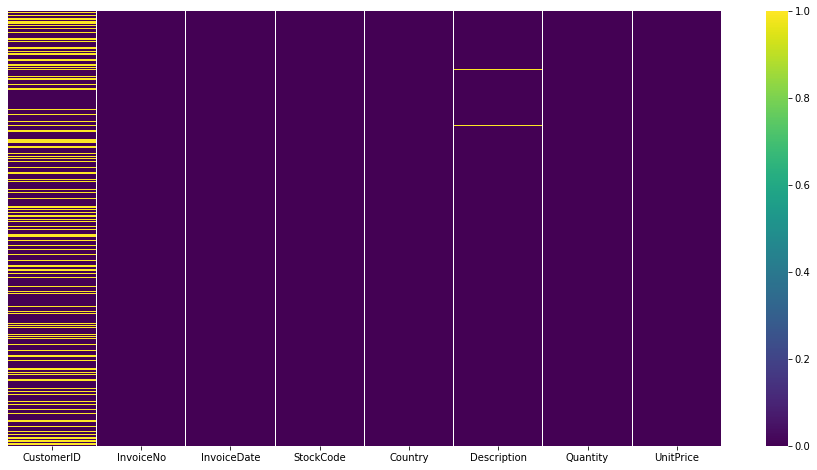

In [15]:
#plotting graph
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False)

In [16]:
# Creating a Definition for checking missing values.
def mdF():
    total_no = df.isnull().sum()
    missing_percentage = (df.isnull().sum()/len(df))*100
    mdF = pd.concat([total_no, missing_percentage], keys=['Missing_Values', 'Missing_Percentage'], axis=1)
    return mdF[mdF['Missing_Values'] > 1]

In [17]:
mdF()

,Missing_Values,Missing_Percentage
CustomerID,135037,25.163377
Description,1454,0.270945


In [18]:
# Drop the entries where both the CustomerID and Description are null values.
df.drop(index=df[df['CustomerID'].isna() & df['Description'].isna()].index, inplace=True)

In [19]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice
0,17850.0,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,17850.0,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39
2,17850.0,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,17850.0,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,17850.0,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39


In [20]:
#getting columns
df.columns

Index(['CustomerID', 'InvoiceNo', 'InvoiceDate', 'StockCode', 'Country',
       'Description', 'Quantity', 'UnitPrice'],
      dtype='object')

In [21]:
mdF()

,Missing_Values,Missing_Percentage
CustomerID,133583,24.960061


In [22]:
# The Major Concept is to identify the Customer Categories, situation cannot proceed further with Missing Customer ID's
# Drop the null values in customer ID field
df.dropna(inplace=True)

In [23]:
#getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   401604 non-null  float64       
 1   InvoiceNo    401604 non-null  object        
 2   InvoiceDate  401604 non-null  datetime64[ns]
 3   StockCode    401604 non-null  object        
 4   Country      401604 non-null  object        
 5   Description  401604 non-null  object        
 6   Quantity     401604 non-null  int64         
 7   UnitPrice    401604 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [24]:
#describing
df.describe()


,CustomerID,Quantity,UnitPrice
count,401604.000000,401604.000000,401604.000000
mean,15281.160818,12.183273,3.474064
std,1714.006089,250.283037,69.764035
min,12346.000000,-80995.000000,0.000000
25%,13939.000000,2.000000,1.250000
50%,15145.000000,5.000000,1.950000
75%,16784.000000,12.000000,3.750000
max,18287.000000,80995.000000,38970.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


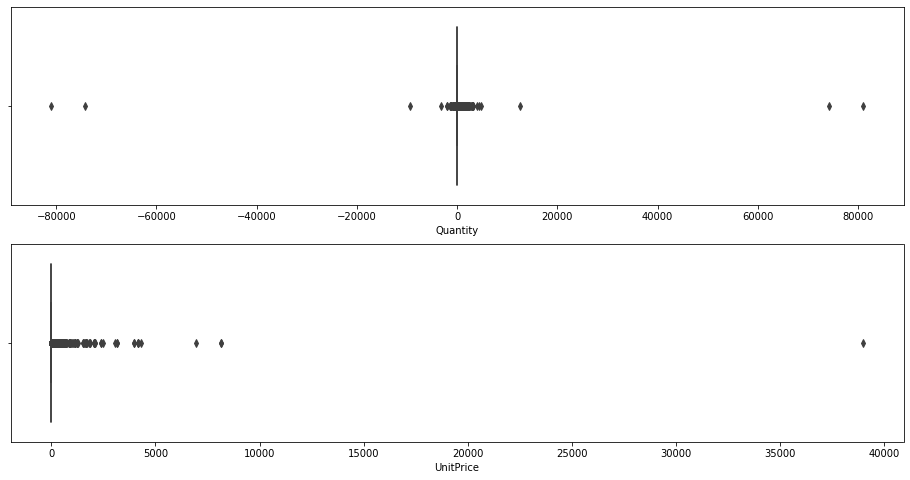

In [25]:
#plotting graph
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.boxplot(df['Quantity'])
plt.subplot(2,1,2)
sns.boxplot(df['UnitPrice'])

In [26]:
# Quantity & Unit Price should never be negative & not equals to Zero
# Grab the data frame where both the fields are positive in nature
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
print("Length of Dataframe is : ",len(df))

Length of Dataframe is :  392692


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


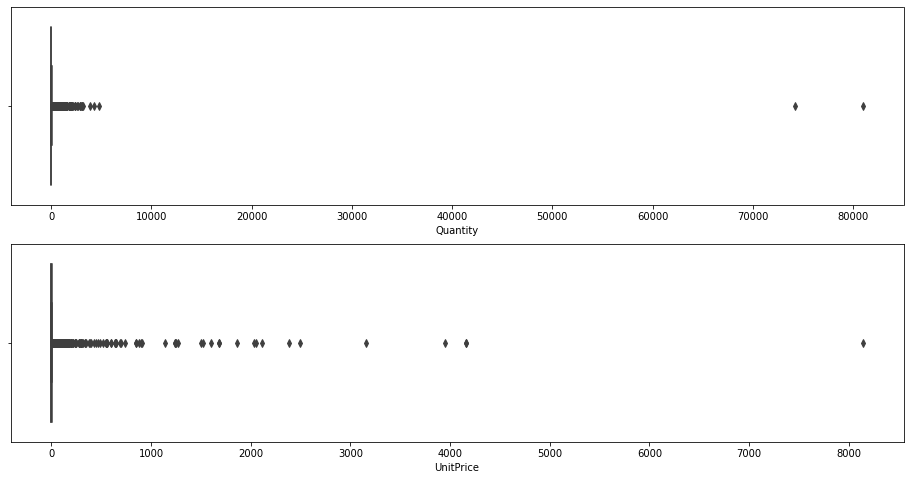

In [27]:
#plotting graph
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.boxplot(df['Quantity'])
plt.subplot(2,1,2)
sns.boxplot(df['UnitPrice'])

In [28]:
df.describe()

,CustomerID,Quantity,UnitPrice
count,392692.000000,392692.000000,392692.000000
mean,15287.843865,13.119702,3.125914
std,1713.539549,180.492832,22.241836
min,12346.000000,1.000000,0.001000
25%,13955.000000,2.000000,1.250000
50%,15150.000000,6.000000,1.950000
75%,16791.000000,12.000000,3.750000
max,18287.000000,80995.000000,8142.750000


In [29]:
# Convert the Data Type of CustomerID to Integer using Lambda Function
df['CustomerID'] = df['CustomerID'].apply(lambda x: int(x))

In [30]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice
0,17850,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,17850,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39
2,17850,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,17850,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,17850,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39


In [31]:
# Draw a new column with the total price paid by the customer
df['Total_Price'] = df['Quantity']*df['UnitPrice']

In [32]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice,Total_Price
0,17850,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,17850,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,17850,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [33]:
# draw different stats from the time stamps
year = df['InvoiceDate'].apply(lambda x: x.year)
month = df['InvoiceDate'].apply(lambda x: x.month)
weekday = df['InvoiceDate'].apply(lambda x: x.weekday())
time_hr = df['InvoiceDate'].apply(lambda x: x.time().hour)
minutes_hr = df['InvoiceDate'].apply(lambda x: x.time().minute)

In [34]:
#getting length
len(year), len(month), len(weekday), len(time_hr), len(minutes_hr)

(392692, 392692, 392692, 392692, 392692)

In [35]:
#converting month no. to month name
monthDict={1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
           7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
month = month.map(monthDict)

In [36]:
#converting no. to week day
day = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
weekday = weekday.map(day)

In [37]:
#creating function to seperate morning afternoon and evening
def Period(x):
    if 6 <= x < 12:
        return 'Morning'
    elif 12 <= x < 16:
        return 'Afternoon'
    elif 16<= x <= 20:
        return 'Evening'

In [38]:
#converting to year month weekday and time
df['Year'] = year
df['Month'] = month
df['WeekDay'] = weekday
df['TimePeriod'] = time_hr
df['TimePeriod'] = df['TimePeriod'].apply(lambda x: Period(x))

In [39]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice,Total_Price,Year,Month,WeekDay,TimePeriod
0,17850,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010,December,Wednesday,Morning
1,17850,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34,2010,December,Wednesday,Morning
2,17850,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010,December,Wednesday,Morning
3,17850,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010,December,Wednesday,Morning
4,17850,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010,December,Wednesday,Morning


In [40]:
#droping column
df.drop(labels='InvoiceDate', axis=1, inplace=True)

In [41]:
#getting head
df.head()

,CustomerID,InvoiceNo,StockCode,Country,Description,Quantity,UnitPrice,Total_Price,Year,Month,WeekDay,TimePeriod
0,17850,536365,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010,December,Wednesday,Morning
1,17850,536365,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34,2010,December,Wednesday,Morning
2,17850,536365,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010,December,Wednesday,Morning
3,17850,536365,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010,December,Wednesday,Morning
4,17850,536365,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010,December,Wednesday,Morning


In [42]:
#getting columns
df.columns

Index(['CustomerID', 'InvoiceNo', 'StockCode', 'Country', 'Description',
       'Quantity', 'UnitPrice', 'Total_Price', 'Year', 'Month', 'WeekDay',
       'TimePeriod'],
      dtype='object')

In [43]:
#shifting columns 
df = df[['CustomerID', 'InvoiceNo', 'Year', 'Month', 'WeekDay','TimePeriod',
         'StockCode', 'Country', 'Description', 'Quantity', 'UnitPrice', 'Total_Price']]

In [44]:
df.head()

,CustomerID,InvoiceNo,Year,Month,WeekDay,TimePeriod,StockCode,Country,Description,Quantity,UnitPrice,Total_Price
0,17850,536365,2010,December,Wednesday,Morning,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,2010,December,Wednesday,Morning,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,2010,December,Wednesday,Morning,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,17850,536365,2010,December,Wednesday,Morning,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,17850,536365,2010,December,Wednesday,Morning,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [45]:
#copying df
customerDF = df.copy()

In [46]:
customerDF.head()#getting head

,CustomerID,InvoiceNo,Year,Month,WeekDay,TimePeriod,StockCode,Country,Description,Quantity,UnitPrice,Total_Price
0,17850,536365,2010,December,Wednesday,Morning,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,2010,December,Wednesday,Morning,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,2010,December,Wednesday,Morning,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,17850,536365,2010,December,Wednesday,Morning,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,17850,536365,2010,December,Wednesday,Morning,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [47]:
customerDF.info()#getting info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   392692 non-null  int64  
 1   InvoiceNo    392692 non-null  object 
 2   Year         392692 non-null  int64  
 3   Month        392692 non-null  object 
 4   WeekDay      392692 non-null  object 
 5   TimePeriod   392692 non-null  object 
 6   StockCode    392692 non-null  object 
 7   Country      392692 non-null  object 
 8   Description  392692 non-null  object 
 9   Quantity     392692 non-null  int64  
 10  UnitPrice    392692 non-null  float64
 11  Total_Price  392692 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 38.9+ MB


In [48]:
customerDF.describe()#describing

,CustomerID,Year,Quantity,UnitPrice,Total_Price
count,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000
mean,15287.843865,2010.934631,13.119702,3.125914,22.631500
std,1713.539549,0.247177,180.492832,22.241836,311.099224
min,12346.000000,2010.000000,1.000000,0.001000,0.001000
25%,13955.000000,2011.000000,2.000000,1.250000,4.950000
50%,15150.000000,2011.000000,6.000000,1.950000,12.450000
75%,16791.000000,2011.000000,12.000000,3.750000,19.800000
max,18287.000000,2011.000000,80995.000000,8142.750000,168469.600000


In [49]:
customerDF.describe(include=['O'])#describing

,InvoiceNo,Month,WeekDay,TimePeriod,StockCode,Country,Description
count,392692,392692,392692,392692,392692,392692,392692
unique,18532,12,6,3,3665,37,3877
top,576339,November,Thursday,Afternoon,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
freq,542,63168,79243,231998,2023,349203,2016


##**EXPLORATORY DATA ANALYSIS (EDA):**

Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task.

##**01 - Best Customers**


Best Customers are who have paid more to the company/service and continuously purchasing the products.

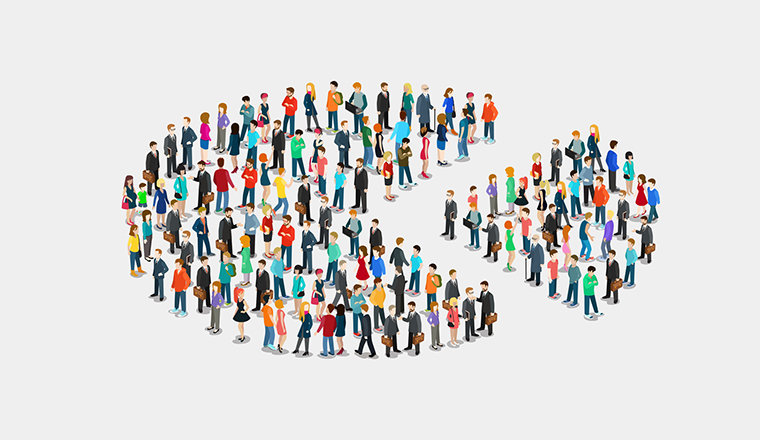

**Top 30 Customers of our Retail Chain are**

In [50]:
#extracting best customers using groupby
best_customers = customerDF.groupby(by='CustomerID')['Total_Price'].sum().sort_values(ascending=False)[:30]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


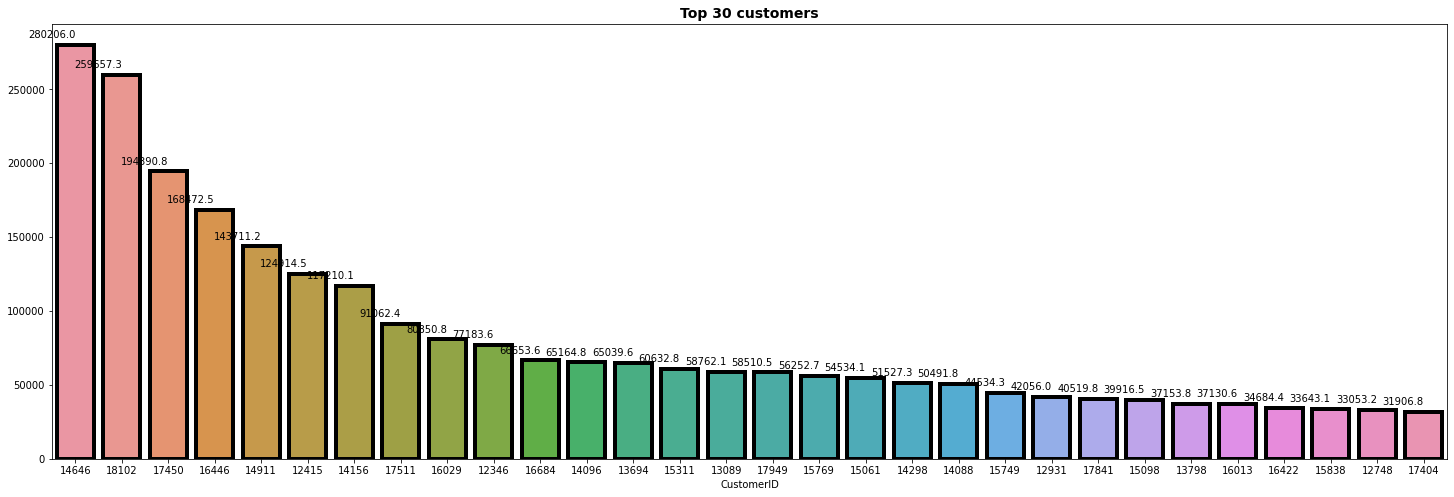

In [71]:
# Here, we plot the bar plot
plt.figure(figsize=(55,8))
plt.subplot(1,2,1)
ax=sns.barplot(best_customers.index, best_customers.values, order=best_customers.index,lw=4,
               ec='black',hatch='')
plt.title("Top 30 customers", fontsize=14, fontweight="bold")

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'right', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##**02 - Worst Customers**
* Every Customer is a Good Customer, the worst could be measured in terms of loyalty.

* Every penny recieved from the customer is an achievement and the hardwork of the company.

##**03 - Periodical Purchasing Stats**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

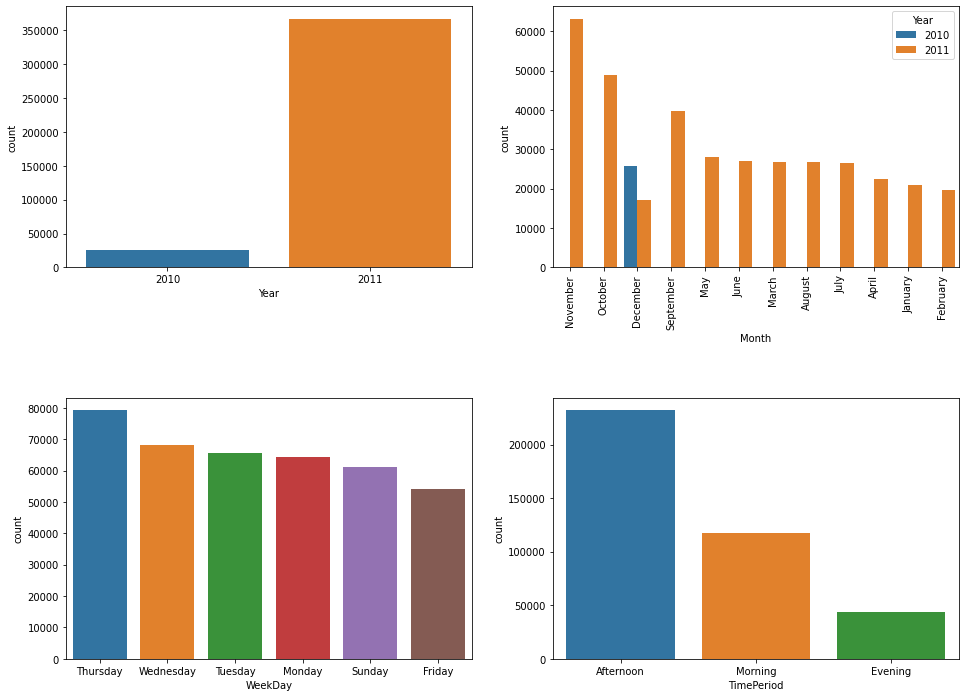

In [52]:
#plotting graph of periodical purchasing 
plt.figure(figsize=(16,12))
plt.subplots_adjust(hspace=0.5)
plt.subplot(221)
sns.countplot(customerDF['Year'])
plt.subplot(222)
plt.xticks(rotation=90)
sns.countplot(customerDF['Month'], order=customerDF['Month'].value_counts().index, hue=customerDF['Year'])
plt.subplot(223)
sns.countplot(customerDF['WeekDay'], order=customerDF['WeekDay'].value_counts().index)
plt.subplot(224)
sns.countplot(customerDF['TimePeriod'], order=customerDF['TimePeriod'].value_counts().index)


**Insights from the Periodical Plots:**

**OBSERVATION:**

* Sales are very high in October, November & December

* We have only December sales data from 2010

* The Retail Store is Closed on Saturday as per the Information available

* More number of sales are happening during Middle of the week(Tuesday, Wednesday and Thursday in ascending order respectively)

* People are usually visiting the store during the afternoon hours when compared to Mornng & Evening Times

* The total no of sales in December 2010 is higher then December 2011

* Management has to concentrate on the decrease of sales in December

##**04 - Most Revenue Generated WeekDay**

In [54]:
#EXTRACTING MOST REVENUE GENERATED WEEKDAY USING GROUPBY 
weekly_sales = customerDF.groupby(by='WeekDay')['Total_Price'].sum().sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


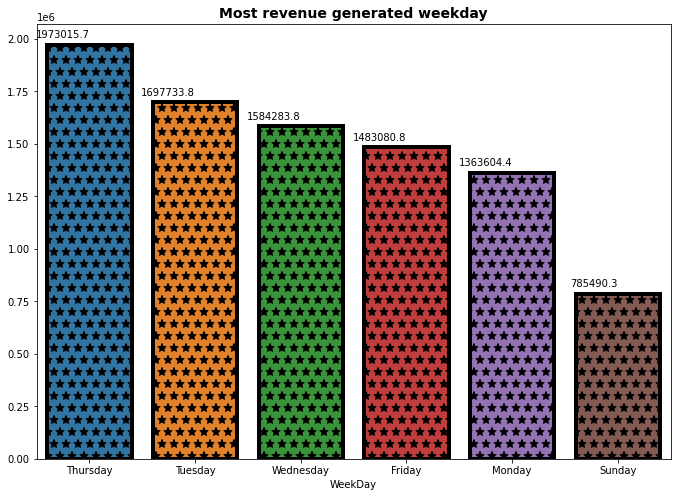

In [63]:
# Here, we plot the bar plot
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
ax=sns.barplot(weekly_sales.index, weekly_sales.values, order=weekly_sales.index,lw=4,
               ec='black',hatch='*')
plt.title("Most revenue generated weekday", fontsize=14, fontweight="bold")

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'right', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**OBSERVATION:**

* On Thursday Company is generating the highest Revenue
* On Sunday company is generating less revenue

##**05 - Purchase Stats**


- Regional Purchase Information

In [72]:
#getting purchase stas
country_sales = customerDF.groupby(by='Country')['Total_Price'].sum().sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


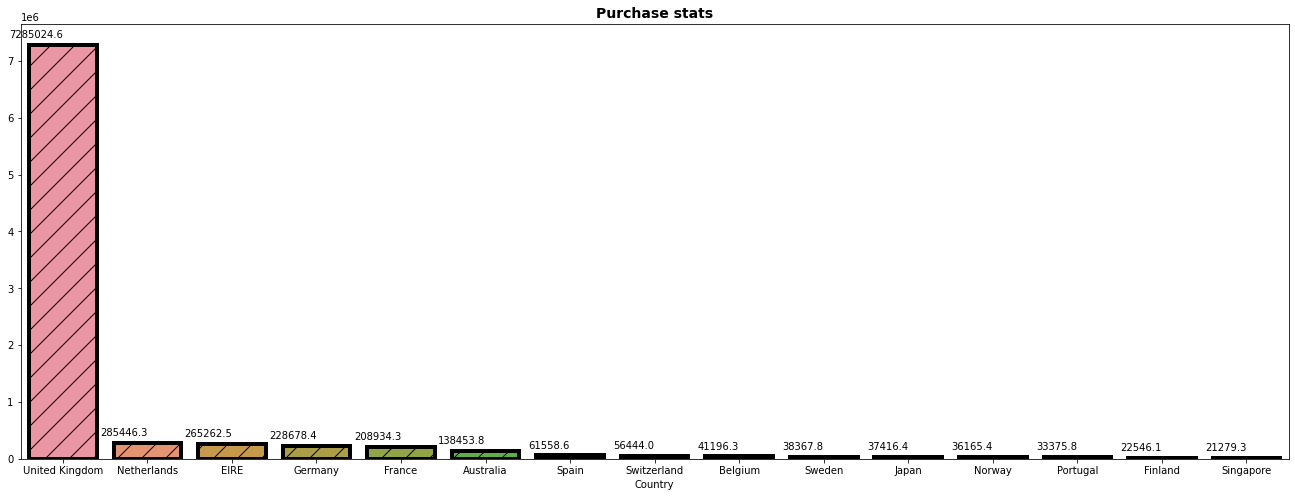

In [76]:
# Here, we plot the bar plot
plt.figure(figsize=(50,8))
plt.subplot(1,2,1)
ax=sns.barplot(country_sales[:15].index, country_sales[:15].values,lw=4,
               ec='black',hatch='/')
plt.title("Purchase stats", fontsize=14, fontweight="bold")

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'right', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**OBSERVATION:**

* Here we can see united kingdom is the country which purchace more items as compared to oyher country.
* Singapore is a least purchasing country.

**Top Purchasing Countries:**

In [77]:
#extracting top purchasing country
sales = df.groupby(by='Country').agg({'Quantity' : 'sum', 
                                      'Total_Price' : 'sum'}).sort_values(by=['Quantity'], ascending=False)

In [79]:
#top 10
sales=sales[:10]
sales=sales.reset_index()
sales

,Country,Quantity,Total_Price
0,United Kingdom,4241305,7.285025e+06
1,Netherlands,200361,2.854463e+05
2,EIRE,140133,2.652625e+05
3,Germany,119154,2.286784e+05
4,France,111428,2.089343e+05
5,Australia,83891,1.384538e+05
6,Sweden,36078,3.836783e+04
7,Switzerland,30082,5.644395e+04
8,Spain,27933,6.155856e+04
9,Japan,26016,3.741637e+04


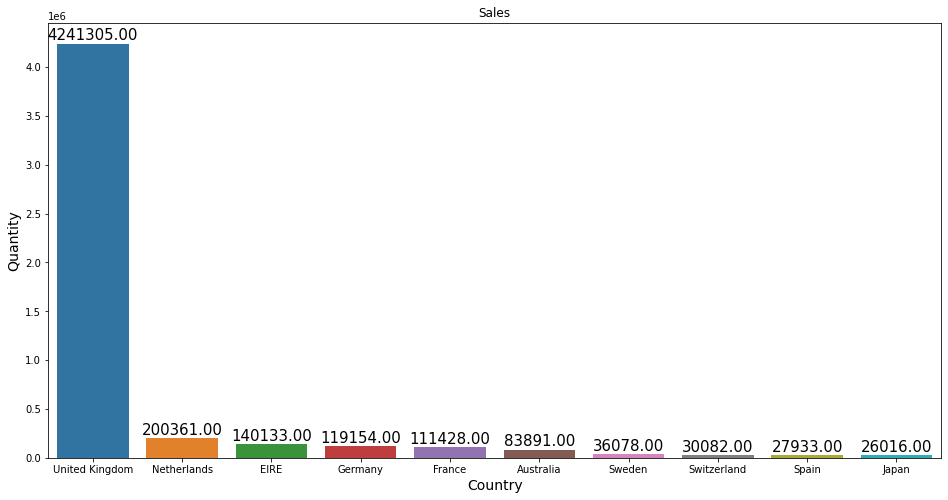

In [80]:
# Defining the plot size
plt.figure(figsize=(16, 8))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="Country", y="Quantity", data=sales)
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Country", size=14)
 
# Setting the label for y-axis
plt.ylabel("Quantity", size=14)
 
# Setting the title for the graph
plt.title("Sales")
 
# Finally showing the plot
plt.show()

**Lease Purchasing Countries:**

In [82]:
#extracting least purchasing country
lease=sales[-10:].sort_values(by=['Total_Price']).reset_index()
lease

,index,Country,Quantity,Total_Price
0,9,Japan,26016,3.741637e+04
1,6,Sweden,36078,3.836783e+04
2,7,Switzerland,30082,5.644395e+04
3,8,Spain,27933,6.155856e+04
4,5,Australia,83891,1.384538e+05
5,4,France,111428,2.089343e+05
6,3,Germany,119154,2.286784e+05
7,2,EIRE,140133,2.652625e+05
8,1,Netherlands,200361,2.854463e+05
9,0,United Kingdom,4241305,7.285025e+06


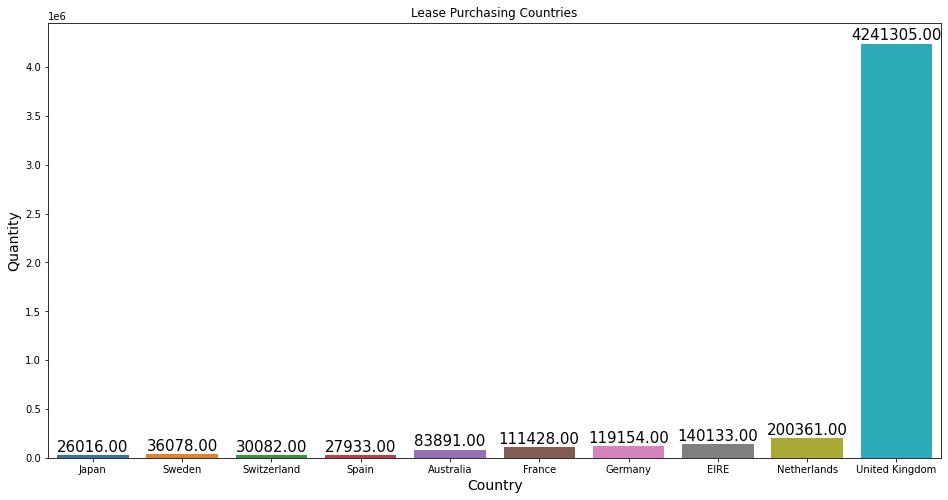

In [83]:
# Defining the plot size
plt.figure(figsize=(16, 8))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="Country", y="Quantity", data=lease)
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Country", size=14)
 
# Setting the label for y-axis
plt.ylabel("Quantity", size=14)
 
# Setting the title for the graph
plt.title("Lease Purchasing Countries")
 
# Finally showing the plot
plt.show()

##**06 - Product Sales Categorization**

In [84]:
#extracting product sale
product_sales = customerDF.groupby(by='Description')['Quantity'].sum().sort_values(ascending=False)

WordCloud for Products

In [86]:
#importing package
from wordcloud import WordCloud

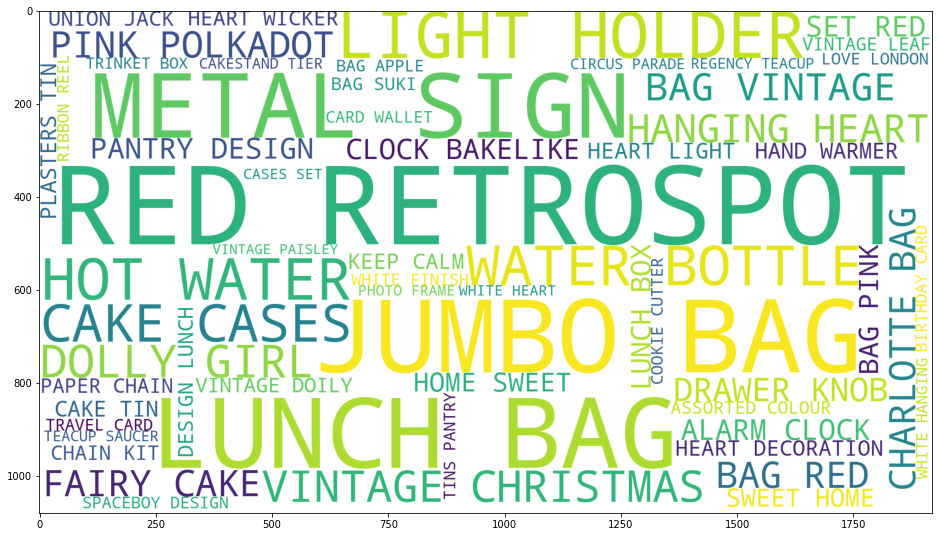

In [87]:
#plotting word cloud
text = " ".join(df['Description'].values.tolist())
img = WordCloud(width=1920, height=1080,
                background_color='white', max_words=60).generate(text)
plt.figure(figsize=(16,10))
plt.imshow(img)

##**07 - Top 20 Sold Products**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


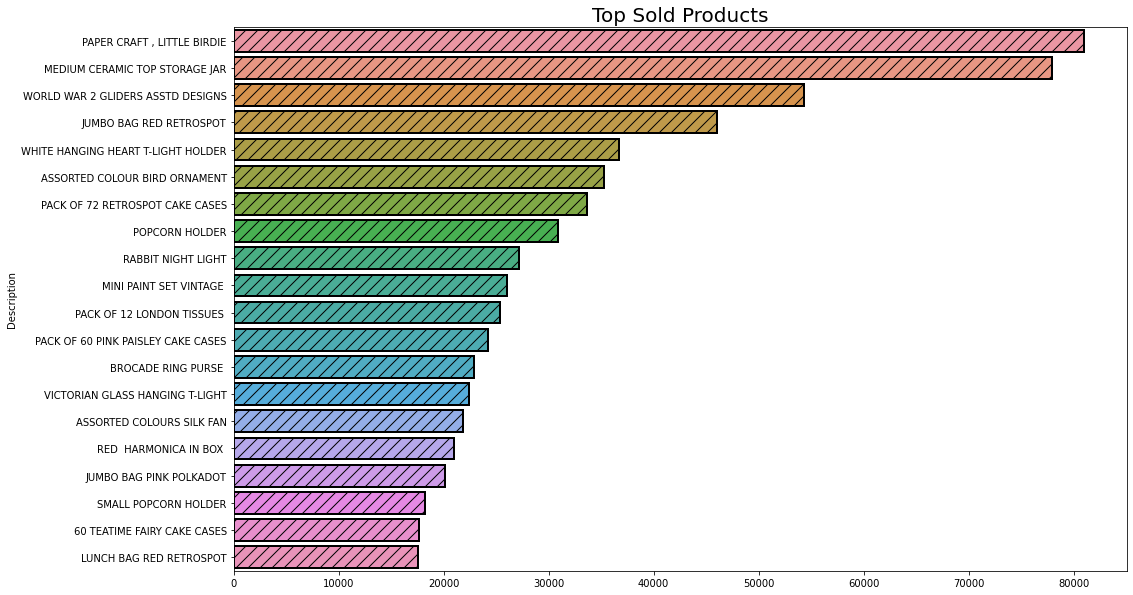

In [88]:
#plotting graph
plt.figure(figsize=(16,10))
plt.title("Top Sold Products", fontsize=20)
sns.barplot(product_sales[:20].values, product_sales[:20].index,ec='black',linewidth=2,hatch='//')

**OBSERVATION:**

* Here we can see most sold product product is Paper craft, little birdie and leat sold product is lunch bad red retrospot

##**08 - Most Revenue Generated Products**

In [90]:
#extracting most revenue generated product
product_revenue = customerDF.groupby(by='Description')['Total_Price'].sum().sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


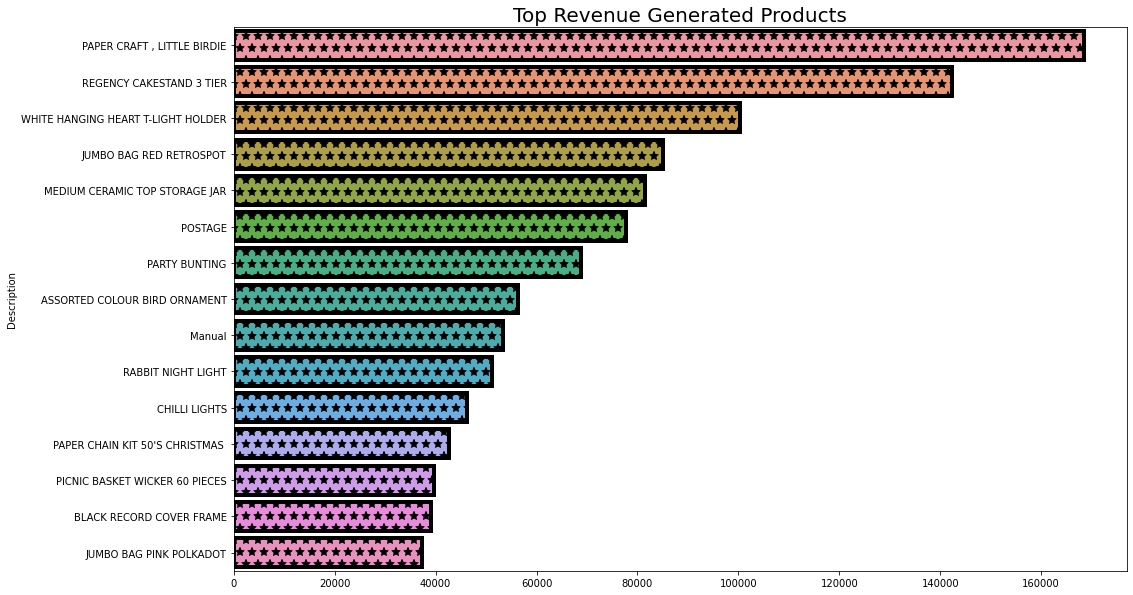

In [91]:
#plotting graph
plt.figure(figsize=(16,10))
plt.title("Top Revenue Generated Products", fontsize=20)
sns.barplot(product_revenue[:15].values, product_revenue[:15].index,lw=4,
               ec='black',hatch='*')

**OBSERVATION:**

* Here we can see most revenue generated product is Paper craft, little birdie and least revenue generated product is jumbo bag pink polkadot.

##**09 - Customers Stats (Loyalty, Daily Buyer)**


* Customer loyalty is the act of choosing one company's products and services consistently over their competitors. When a customer is loyal to one company, they aren't easily swayed by price or availability. They would rather pay more and ensure the same quality service & product they know

* Since we don't have the purchase stats of our customers with the other companies, Let us seggregate them into 3 Categories based on thier purchases as Bronze, Silver and Gold

In [92]:
#extracting loyal customers
loyal_customers = customerDF.groupby(by='CustomerID')['Quantity'].sum().sort_values(ascending=False)

Customers Who are willing to purchase most from the store:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


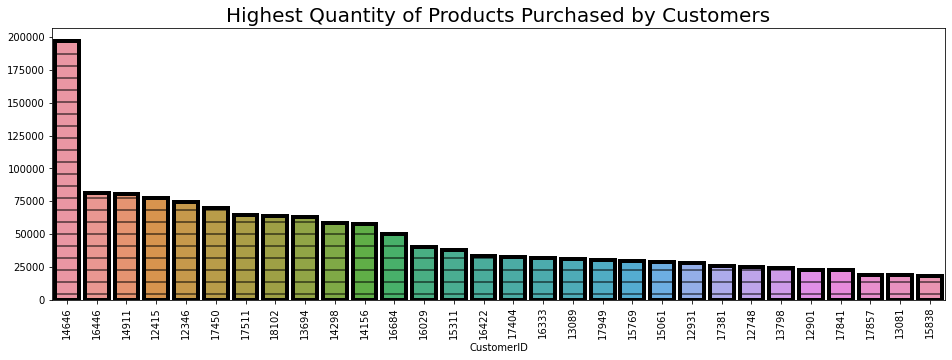

In [93]:
#plotting graph
plt.figure(figsize=(16,5))
plt.xticks(rotation=90)
plt.title("Highest Quantity of Products Purchased by Customers", fontsize=20)
sns.barplot(loyal_customers[:30].index, loyal_customers[:30].values, order=loyal_customers[:30].index,lw=4,
               ec='black',hatch='-')

In [94]:
#describing
loyal_customers.describe()

count      4338.000000
mean       1187.644537
std        5043.619654
min           1.000000
25%         159.000000
50%         378.000000
75%         989.750000
max      196915.000000
Name: Quantity, dtype: float64

In [95]:
#creating function to divide customers into bronze silver gold category
def Loyalty(x):
    if x<500:
        return "Bronze"
    elif 500 <= x < 1000:
        return "Silver"
    elif x >= 1000:
        return "Gold"

In [96]:
#applying function
loyal_customers_categories = loyal_customers.apply(lambda x: Loyalty(x))

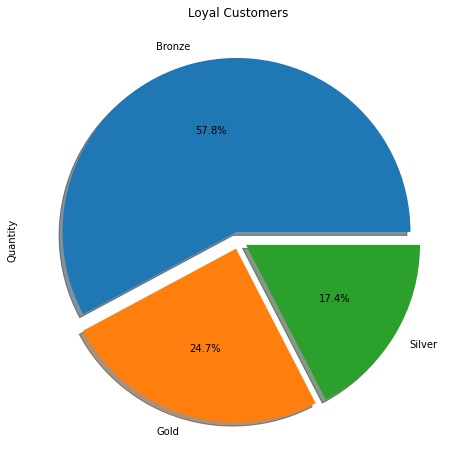

In [97]:
#plottingh pie diagram
loyal_customers_categories.value_counts().plot.pie(figsize=(10,8),legend=False,autopct='%1.1f%%',shadow=True,explode=(0.05,0.05,0.05),title='Loyal Customers')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


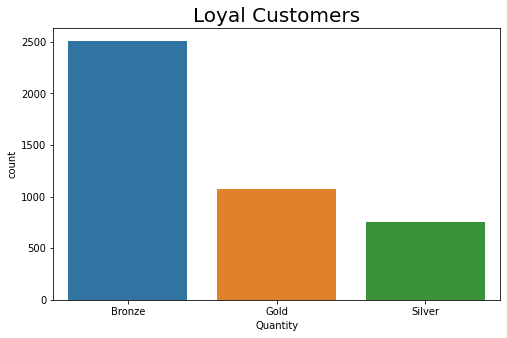

In [98]:
#plotting graph
plt.figure(figsize=(8,5))
plt.title("Loyal Customers", fontsize=20)
sns.countplot(loyal_customers_categories, order=loyal_customers_categories.value_counts().index)

**OBSERVATION:**

* Here we can see we have more no. of bronze customers.

##**10 - Customers Who Buy Often, But Spend Very Little**

In [99]:
#daily customers
daily_customers = customerDF.groupby(by='CustomerID').agg(
    {"InvoiceNo" : "nunique","Total_Price" : 'sum'}).sort_values(by=['InvoiceNo', 'Total_Price'], ascending=[False, True])

# Considering 20,000 is less payment from Daily Customers
daily_customers = daily_customers[daily_customers['Total_Price'] < 20000]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


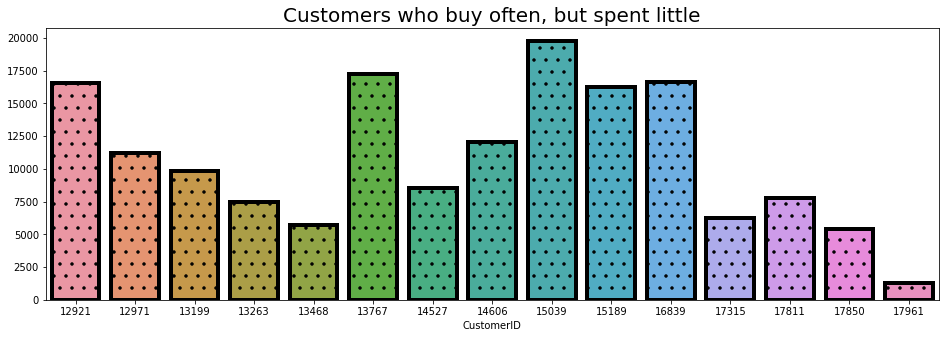

In [100]:
#plotting graph
plt.figure(figsize=(16,5))
plt.title("Customers who buy often, but spent little", fontsize = 20)
sns.barplot(daily_customers['Total_Price'][:15].index,
            daily_customers['Total_Price'][:15].values,lw=4,
               ec='black',hatch='.')

##**11 - Customers We have Lost**

In [102]:
#extracting lost customers
lost_customers = customerDF[customerDF['Year'] == 2011].groupby(by='Month')['CustomerID'].nunique()

lost_customers

Month
April         856
August        935
December      615
February      758
January       741
July          949
June          991
March         974
May          1056
November     1664
October      1364
September    1266
Name: CustomerID, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


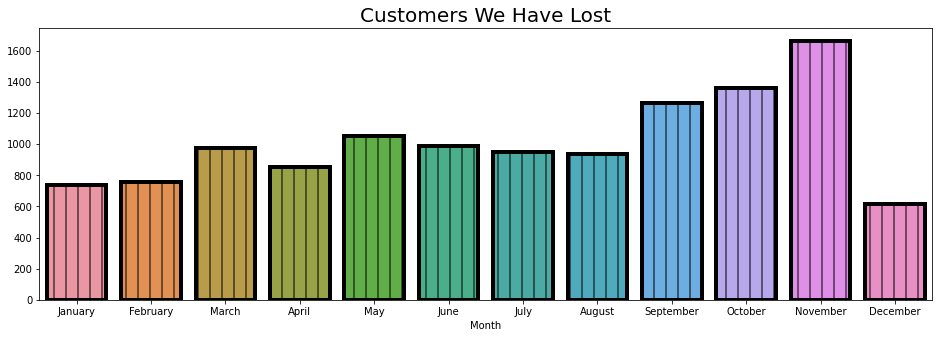

In [103]:
#plotting graph
plt.figure(figsize=(16,5))
plt.title('Customers We Have Lost', fontsize = 20)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(lost_customers.index, lost_customers.values, order=months,lw=4,
               ec='black',hatch='|')

**OBSERVATION:**

* We can observe that very number of customers are lost visiting the store. At the end of the year many customers are lost.